In [1]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd

# Load the dataset
file_path = 'mushrooms.csv'  # Replace with the actual path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

# Check for missing values and data types
df.info()

# Display summary statistics for numerical features (if any)
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


<Axes: title={'center': 'Distributed of Edible vs Poinsonous Mushrooms'}, xlabel='class'>

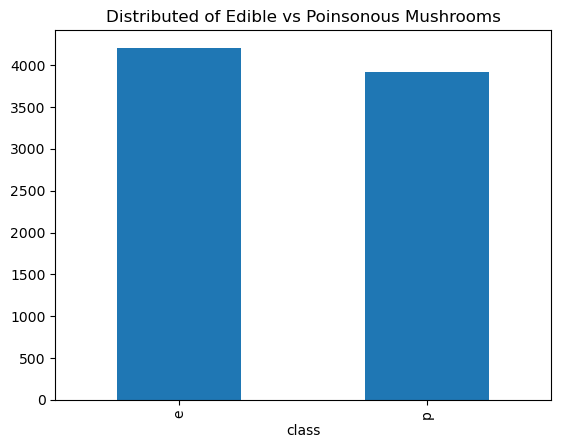

In [2]:
#distribution of the target variable 
df["class"].value_counts().plot(kind="bar", title="Distributed of Edible vs Poinsonous Mushrooms")

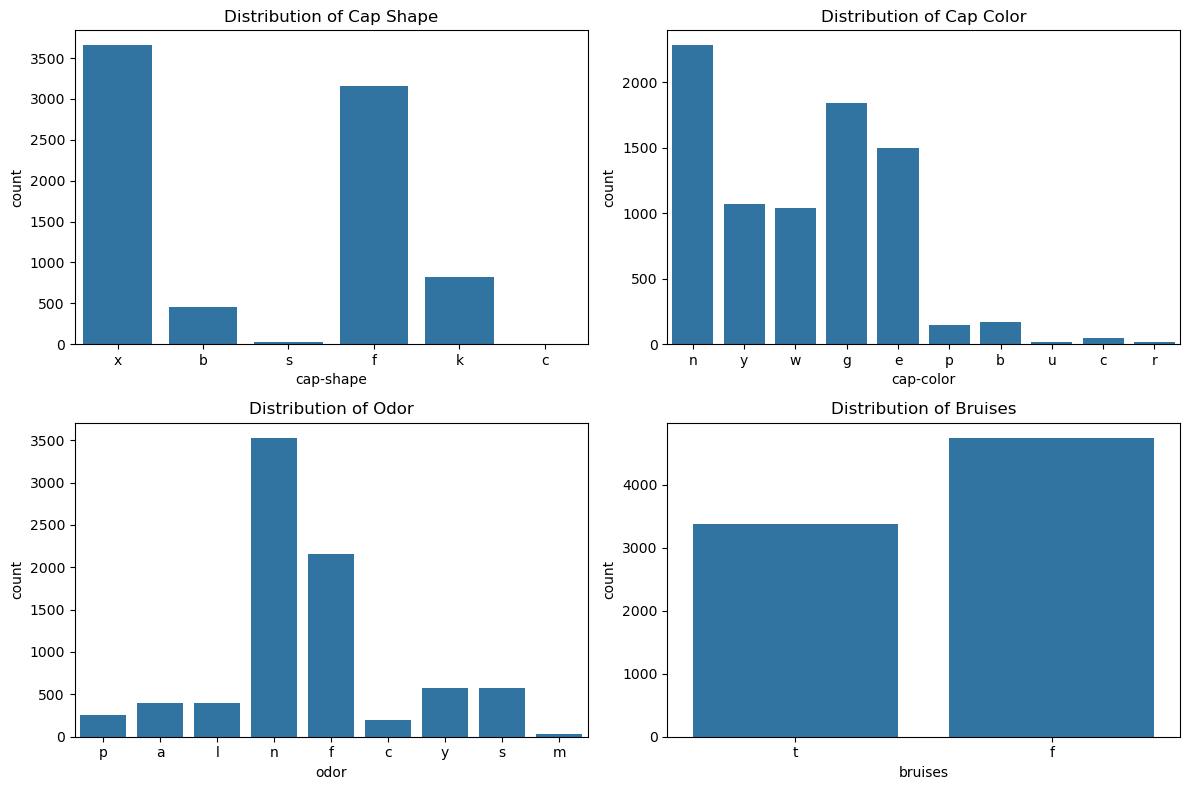

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 8))

# Plot for 'cap-shape'
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='cap-shape')
plt.title('Distribution of Cap Shape')

# Plot for 'cap-color'
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='cap-color')
plt.title('Distribution of Cap Color')

# Plot for 'odor'
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='odor')
plt.title('Distribution of Odor')

# Plot for 'bruises'
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='bruises')
plt.title('Distribution of Bruises')

plt.tight_layout()
plt.show()


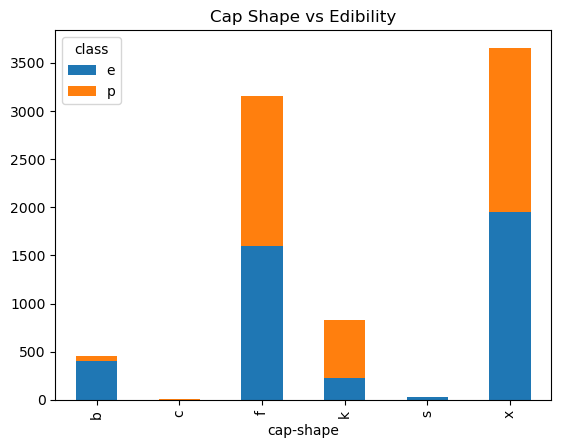

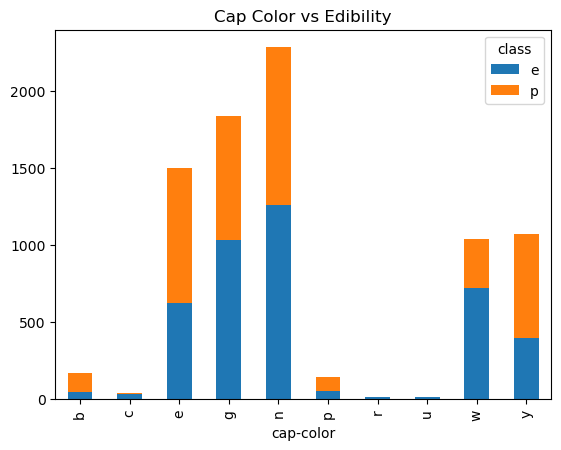

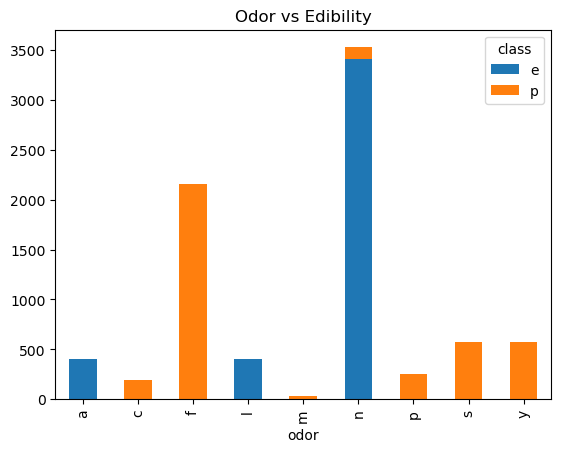

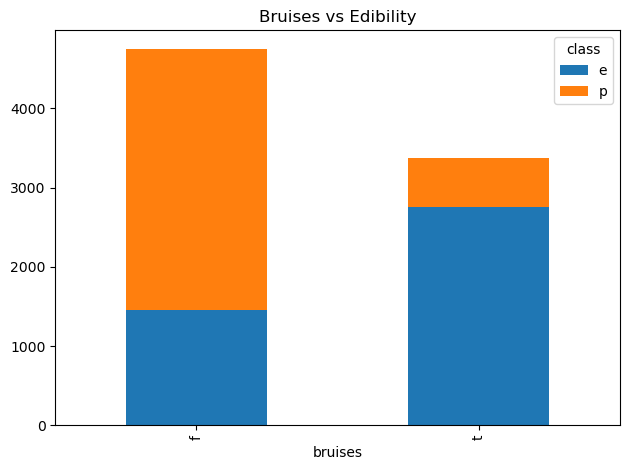

In [4]:
# Cross-tabulation for 'cap-shape' and 'class'
pd.crosstab(df['cap-shape'], df['class']).plot(kind='bar', stacked=True)
plt.title('Cap Shape vs Edibility')

# Cross-tabulation for 'cap-color' and 'class'
pd.crosstab(df['cap-color'], df['class']).plot(kind='bar', stacked=True)
plt.title('Cap Color vs Edibility')

# Cross-tabulation for 'odor' and 'class'
pd.crosstab(df['odor'], df['class']).plot(kind='bar', stacked=True)
plt.title('Odor vs Edibility')

# Cross-tabulation for 'bruises' and 'class'
pd.crosstab(df['bruises'], df['class']).plot(kind='bar', stacked=True)
plt.title('Bruises vs Edibility')

plt.tight_layout()
plt.show()


In [5]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copy the original data
df_copy = df.copy()

# Encode the categorical variables using LabelEncoder
encoder = LabelEncoder()

for column in df_copy.columns:
    df_copy[column] = encoder.fit_transform(df_copy[column])

# Define the features (X) and target (y)
X = df_copy.drop('class', axis=1)
y = df_copy['class']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(6499, 22) (1625, 22) (6499,) (1625,)


In [6]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Predict using Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)

# Decision Tree
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

# Predict using Decision Tree
y_pred_tree = tree_clf.predict(X_test)

# Print evaluation metrics
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Logistic Regression:
Accuracy: 0.947076923076923
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Decision Tree:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = rf_clf.predict(X_test)

# Print evaluation metrics
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



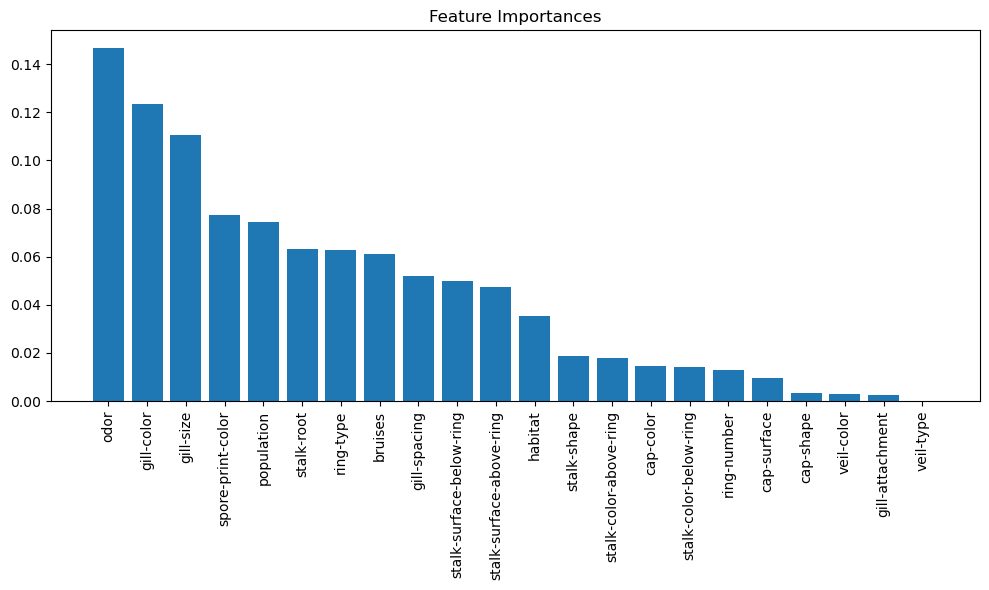

In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importance from the Random Forest model
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importance in descending order

# Visualize the top features
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for Random Forest
cv_scores = cross_val_score(rf_clf, X, y, cv=5)

# Print the cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")


Cross-Validation Scores: [0.84246154 1.         1.         1.         0.60652709]
Mean CV Score: 0.8897977264115194


In [10]:
from sklearn.svm import SVC

# Train a Support Vector Machine
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

# Predict and evaluate the SVM model
y_pred_svc = svc_clf.predict(X_test)

# Print evaluation metrics
print("Support Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))


Support Vector Machine:
Accuracy: 0.9926153846153846
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [11]:
#!pip install shap

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [13]:
import shap

# Create a SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(rf_clf)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Check the shape of SHAP values and X_test
print("SHAP values shape:", [s.shape for s in shap_values])
print("X_test shape:", X_test.shape)

# Visualize the SHAP summary plot for the second class (index 1)
shap.summary_plot(shap_values[1], X_test, feature_names=X.columns)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
# Function to simulate new mushroom data and predict its class
def predict_mushroom(mushroom_features):
    # Create a DataFrame with all feature names used during model training
    columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
               'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
               'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
               'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
               'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 
               'population', 'habitat']
    
    # Create a DataFrame with the mushroom features provided by the user
    input_data = pd.DataFrame([mushroom_features], columns=columns)
    
    # Use the trained model to predict
    prediction = rf_clf.predict(input_data)
    
    # Return prediction result
    if prediction == 0:
        return "Edible"
    else:
        return "Poisonous"

# Example input: A mushroom with all necessary features
new_mushroom = {
    'cap-shape': 5,  # Change these values based on label-encoded values
    'cap-surface': 2,
    'cap-color': 6,
    'bruises': 1,
    'odor': 0,
    'gill-attachment': 1,
    'gill-spacing': 1,
    'gill-size': 1,
    'gill-color': 4,
    'stalk-shape': 1,
    'stalk-root': 2,
    'stalk-surface-above-ring': 1,
    'stalk-surface-below-ring': 1,
    'stalk-color-above-ring': 3,
    'stalk-color-below-ring': 3,
    'veil-type': 0,
    'veil-color': 2,
    'ring-number': 1,
    'ring-type': 2,
    'spore-print-color': 3,
    'population': 2,
    'habitat': 3
}

# Predict whether the mushroom is edible or poisonous
result = predict_mushroom(new_mushroom)
print(f"The mushroom is: {result}")

